# SIMULACIÓN: LABORATORIO 1
### Entrega: martes 24 de agosto 2021, 23:59 horas


### Integrantes: 
- Francisco Levin
- Diego Mora

### CONTENIDOS
- Ejemplo del lanzamiento de monedas
- Conceptos: Espacio muestral, evento, probabilidad
- Principios de probabilidad y propiedades



### ¿Cómo asignamos valores de probabilidad?

- $\textbf{Enfoque frecuentista relativo o de simulación:}$ Sea $n$ el número de experimentos, y $n(A)$ el número de veces que el evento $A$ ocurre en la realización de esos experimentos, entonces $P(A) = \frac{n(A)}{n}$

- $\textbf{Enfoque frecuentista clásico:}$ Sea $n(A)$ el número elementos en el evento $A$, y $n(\Omega)$ el número de elementos en el espacio muestral $\Omega$, entonces $P(A) = \frac{n(A)}{n(\Omega)}$

- $\textbf{Enfoque Bayesiano:}$ Yo pienso que la probabilidad de que me gane un proyecto es $0.9$ (probabilidad a priori).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

## Lanzamiento de monedas

In [3]:
# Define algunos parámetros del contexto de trabajo
sns.set_context("notebook", 
                font_scale=1.5, 
                rc={"lines.linewidth": 2.5})
sns.set_style('whitegrid')
sns.set_palette('deep')
# Crea dic variables de color que serán usadas en este contexto
rojo= sns.xkcd_rgb['vermillion']
azul= sns.xkcd_rgb['dark sky blue']


In [4]:
#utilzaremos la distribución binomial para modelar el experimento del lanzamiento de una moneda n veces
def factorial(n):
    """Calcula factorial de `n`
    """
    vals = list(range(1, n + 1))
    if len(vals) <= 0:
        return 1

    prod = 1
    for val in vals:
        prod *= val
        
    return prod
    
    
def n_choose_k(n, k):
    """Calcula la combinatoria de n y k 
    """
    return factorial(n) / (factorial(k) * factorial(n - k))


def binom_prob(n, k, p):
    """Retorna la probabilidad de que ocurran `k` caras in `n` lanzamientos de una moneda
    
    Argumentos:
    
    n - número de ensayos
    k - número de ensayos en los que se obtiene cara
    p - probabilidad de que el evento "obtener cara" ocurra
    
    """
    return n_choose_k(n, k) * p**k * (1 - p)**(n - k)

def lanzaMoneda(N_caras, N_exper): 
    # Calcula la probabilidad de cada posible salida (N_caras) 
    # del experimento de lanzar N_exper veces una moneda equilibrada
    probabilidades = [binom_prob(N_exper, k, 0.5) for k in range(1, N_exper + 1)]
    #p_value es la probabilidad de que la salida sea mayor o igual que N_caras
    p_value = (np.sum(probabilidades[N_caras-1:]))
    print("P-value: {} %".format(p_value * 100))
    # Grafica la distribución de probabilidad calculada
    plt.step(range(1, N_exper + 1), probabilidades, where='mid', color=azul)
    plt.xlabel('número de caras')
    plt.ylabel('probabilidad')
    plt.plot((N_caras, N_caras), (0, max(probabilidades)), color=rojo)
    
    porc = round((p_value)*100,3)
    plt.annotate( str(porc) + '%', 
                 xytext=(N_caras + 10, max(probabilidades)/2), 
                 xy=(N_caras, max(probabilidades)/2), 
                 multialignment='right',
                 va='center',
                 color=rojo,
#                  size='large',
                 arrowprops={'arrowstyle': '<|-', 
                             'lw': 1, 
                             'color': rojo, 
                             'shrinkA': 1})
    plt.show()
                             
                             

P-value: 4.431304005703379 %


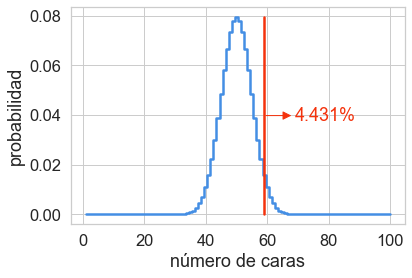

In [5]:
lanzaMoneda(59,100)


P-value simulado: 84.5%
P-value: 83.88818398212265 %


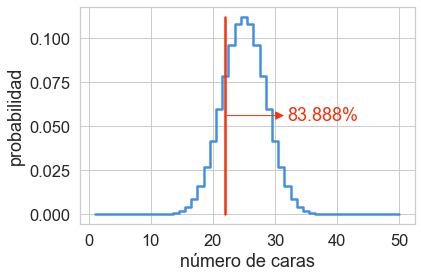

In [6]:
#Simularemos directamente el lanzamiento de la moneda considerando # valores aleatorios para el resultado de cada lanzamiento
M = 0
n = 200  # cambie este valor.
N_caras = 22
N_exper = 50
for i in range(n):
    #genera N_exper valores aleatorios 0 o 1
    ensayos = np.random.randint(2, size=N_exper)
    if (ensayos.sum() >= N_caras):
        M += 1
p = M / n

print("P-value simulado: %0.1f%%" % (p * 100))
lanzaMoneda(N_caras,N_exper)

### Pregunta 1
i) Utilice distintos valores para N_caras y N_exper ¿Qué es el valor "p" en ambos casos?

ii) En el código de la simulación, considere valores crecientes de n ¿Desde qué cantidad la simulación reemplaza el análisis estadístico? Agregue código para graficar el comportamiento de convergencia de la simulación al valor obtenido utilizando la distribución binomial.

### Respuesta

### (i) 

Probabilidad de obtener 30 caras en 70 lanzamientos: 4.68813594%
P-value: 90.58918984884863 %


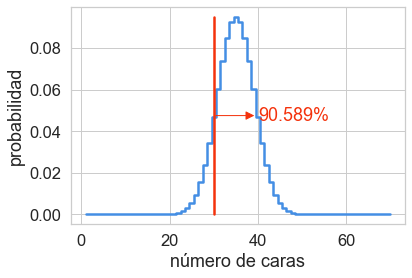

Probabilidad de obtener 10 caras en 25 lanzamientos: 9.74166393%
P-value: 88.5238528251648 %


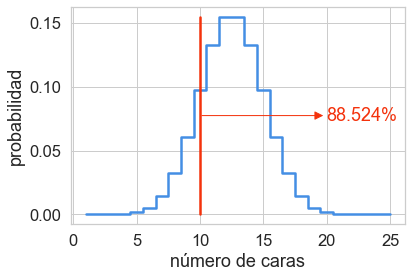

Probabilidad de obtener 180 caras en 300 lanzamientos: 0.01117993%
P-value: 0.03171100034641784 %


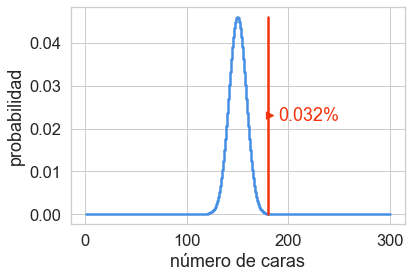

Probabilidad de obtener 100 caras en 200 lanzamientos: 5.63484790%
P-value: 52.81742395046282 %


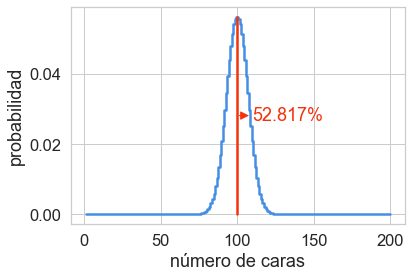

Probabilidad de obtener 300 caras en 500 lanzamientos: 0.00015443%
P-value: 0.00044700332711266336 %


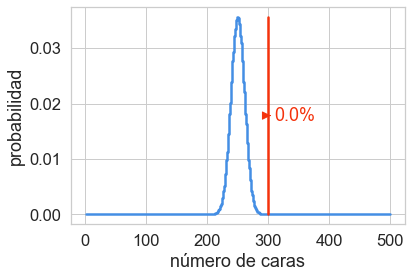

In [7]:
#30 caras en 70 lanzamientos 

print("Probabilidad de obtener 30 caras en 70 lanzamientos: %0.8f%%" % (binom_prob(70, 30, 0.5) * 100))
lanzaMoneda(30, 70)

#10 caras en 25 lanzamientos 
print("Probabilidad de obtener 10 caras en 25 lanzamientos: %0.8f%%" % (binom_prob(25,10, 0.5) * 100))
lanzaMoneda(10, 25)

#180 caras en 300 lanzamientos 
print("Probabilidad de obtener 180 caras en 300 lanzamientos: %0.8f%%" % (binom_prob(300, 180, 0.5) * 100))
lanzaMoneda(180, 300)

#100 caras en 200 lanzamientos 
print("Probabilidad de obtener 100 caras en 200 lanzamientos: %0.8f%%" % (binom_prob(200, 100, 0.5) * 100))
lanzaMoneda(100, 200)
7
#300 caras en 500 lanzamientos
print("Probabilidad de obtener 300 caras en 500 lanzamientos: %0.8f%%" % (binom_prob(500, 300, 0.5) * 100))
lanzaMoneda(300, 500)




Luego de probar con diferentes combinaciones de N_caras y N_exper se observa en general que a medida que la diferencia entre N_caras y N_exper aumenta, el valor de p tiende a aumentar. Cuando el valor de N_caras es cercano a la mitad de N_exper, se observa que el valor de p se acerca a 0.5. Además cuando N_caras es mucho menor a la mitad de N_exper, el valor de p converge en 1.0, esto se debe a que es muy probable que ocurra ese evento.

### ii)

P-value obtenido de distribución binomial: 0.8389
los valores han convergido con 48100 simulaciones en el intento N°96 con salto 500


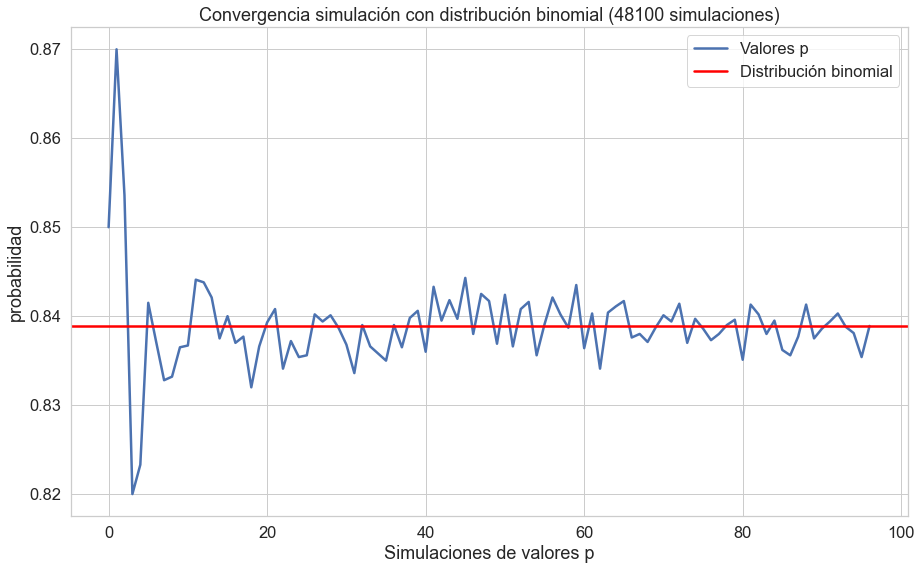

In [8]:
Ncaras = 22
Nexper = 50
Nsim = 100
step = random.choice([10, 50, 100, 500])
lim = 50000
arr_pvalues = []

probabilidades = [binom_prob(Nexper, k, 0.5) for k in range(1, Nexper + 1)]
p_value_binom = round(np.sum(probabilidades[N_caras-1:]), 4)
print("P-value obtenido de distribución binomial: {}".format(p_value_binom))

def simulacion(Nsim, Ncaras, Nexper):
    M = 0
    for i in range(Nsim):
        ensayos = np.random.randint(2, size=N_exper)
        if (ensayos.sum() >= N_caras):
            M += 1
            
    p_value = M / Nsim
    return p_value

while Nsim <= lim:
    p_value = round(simulacion(Nsim, Ncaras, Nexper), 4)
    arr_pvalues.append(p_value)
    
    if p_value == p_value_binom: 
        print("los valores han convergido con {} simulaciones en el intento N°{} con salto {}".format(Nsim, arr_pvalues.index(p_value), step))
        break
    Nsim += step

plt.figure(figsize=(15, 9))
plt.xlabel('Simulaciones de valores p')
plt.ylabel('probabilidad')
plt.plot(arr_pvalues, label='Valores p')
plt.axhline(y=p_value_binom, color='r', linestyle='-', label='Distribución binomial')
plt.title("Convergencia simulación con distribución binomial ({} simulaciones)".format(Nsim))
plt.legend()
plt.show()


### Pregunta 2 
En un certamen literario hay 3 premios: ganador, finalista y mención honrosa. Cada participante sólo puede obtener un premio. Si participan 12 personas en el certamen, se puede definir, el espacio muestral de los posibles resultados como:

${S = \{ \text{todas las formas de ordenar } (1,2,3,4,5,6,7,8,9,10,11,12) \}}$

En donde los números identifican a cada una de las 12 personas y  las primeras tres ubicaciones corresponden a los escritores premiados.

Sea ${A}$ el evento en que la persona #1 es ganador, el evento ${B}$ denota que la persona #2 no gana ningún premio, y el evento ${C}$ es que la persona #3 gana la mención honrosa.

Simule las probabilidades de los siguientes eventos y compare con los valores teóricos:  

(i) $A \cup B$ 

(ii) $A \cap B$

(iii) $A \cap B \cap C$

(iv) $A \cup (B\cap C)$


puede usar random.shuffle de la biblioteca random para generar permutaciones aleatorias de [1,2,...,12] 

### Respuesta

### (i)

In [9]:
participantes = np.arange(1,13)
n = 1000
cont = 0
for i in range(n):
    random.shuffle(participantes)
    if (participantes[0] == 1) or (participantes[0] != 2 and participantes[1] != 2 and participantes[2] != 2):
        cont+=1
p_1 = cont/n
print("Probabilidad obtenida: ", p_1)

Probabilidad obtenida:  0.771


Para calcular el valor teórico, primero se calcula la probabilidad de ocurrencia del evento A.

$$P\left(A\right) = \frac{11!}{12!} = \frac{1}{12} \approx 0.0833$$

Luego, se calcula la probabilidad de ocurrencia de B.

Dado que la probabilidad de que el participante quede en cualquiera de las 12 pocisiones es 1/12, entonces la probabilidad de que gane un premio es 1/12 + 1/12 + 1/12 = 0.25. Por lo tanto, la probabilidad de que no gane premios será 1 - 0.25 = 0.75. 

Luego, la unión entre A y B será:

$$P({A}\cup{B}) = P(A) + P(B) - P({A}\cap{B}) = \frac{1}{12} \approx 0.77$$

La probabilidad obtenida en la simulación se acerca bastante al valor teórico. Se hizo la prueba con distintos números de experimentos y se obtuvo que a medida que la cantidad de experimentos aumenta, la probabilidad de la simulación se acerca al valor teórico.

### (ii)

In [10]:
participantes = np.arange(1,13)
n = 1000
cont = 0
for i in range(n):
    random.shuffle(participantes)
    if (participantes[0] == 1) and (participantes[0] != 2 and participantes[1] != 2 and participantes[2] != 2):
        cont+=1
p_2 = cont/n
print("Probabilidad obtenida: ",p_2)

Probabilidad obtenida:  0.064


Usando las probabilidades de ocurrencia de los eventos A y B calculados en el inciso anterior, se tiene que la intersección de dichos eventos será:

$$P({A}\cap{B}) = P(A) * P(B) = \frac{1}{16} = 0.0625$$

De igual forma se observa que la probabilidad obtenida en la simulación se aproxima al valor teórico en particular cuando se hace la prueba con una cantidad grande de experimentos.

### (iii)

In [11]:
participantes = np.arange(1,13)
n = 1000
cont = 0
for i in range(n):
    random.shuffle(participantes)
    if (participantes[0] == 1) and (participantes[0] != 2 and participantes[1] != 2 and participantes[2] != 2) and (participantes[2] == 3):
        cont+=1
p_3 = cont/n
print("Probabilidad obtenida: ",p_3)

Probabilidad obtenida:  0.006


Para calcular el valor teórico, se usan las proabilidades teóricas calculadas previamente para los eventos A y B, en el caso de C, su probabilidad de ocurrencia será igual al evento A, es decir, 1/12.

Luego, se tiene:

$$P({A}\cap{B}\cap{C}) = P(A) * P(B) * P(C) = \frac{1}{12} * \frac{3}{4} * \frac{1}{12} = 0.0052$$

Al igual que en los casos anteriores, se obtienen resultados muy similares entre la simulación y la probabilidad teórica.

### (iv)

In [17]:
participantes = np.arange(1,13)
n = 1000
cont = 0
for i in range(n):
    random.shuffle(participantes)
    if (participantes[0] == 1) or ((participantes[0] != 2 and participantes[1] != 2 and participantes[2] != 2) and (participantes[2] == 3)):
        cont+=1
p_4 = cont/n
print("Probabilidad obtenida: ",p_4)



Probabilidad obtenida:  0.148


Considerando las probabilidades de ocurrencia de los eventos A, B y C se puede calcular la probabilidad de este evento, como sigue:

Siguiendo la jerarquía de paréntesis, primero se calcula la intersección entre B y C.

$$P({B}\cap{C}) = P(B) * P(C) = \frac{3}{4} * \frac{1}{12} = \frac{1}{16} = 0.0625$$

Luego, se calcula la unión entre A y este evento.

$$P({A}\cup{({B} \cap {C})}) = P(A) + P({B} \cap {C}) - P({A} \cap ({{B} \cap {C}})) \approx 0.1406$$

Se obtiene de igual forma que en los eventos anteriores una probabilidad en la simulación muy cercana al valor teórico.

### Pregunta 3

(i)  Demuestre (b) y (c) en la propiedad de Independencia.

(ii) Demuestre el Teorema de las Probabiliades totales.


### Respuesta

### (i) Demostración de la propiedad de Independencia para b) y c)

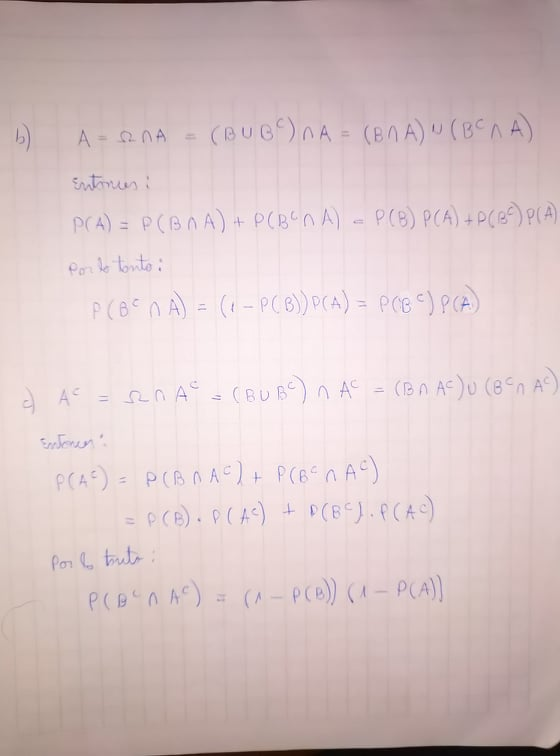

### (ii) Demostración del Teorema de las Probabiliades totales.

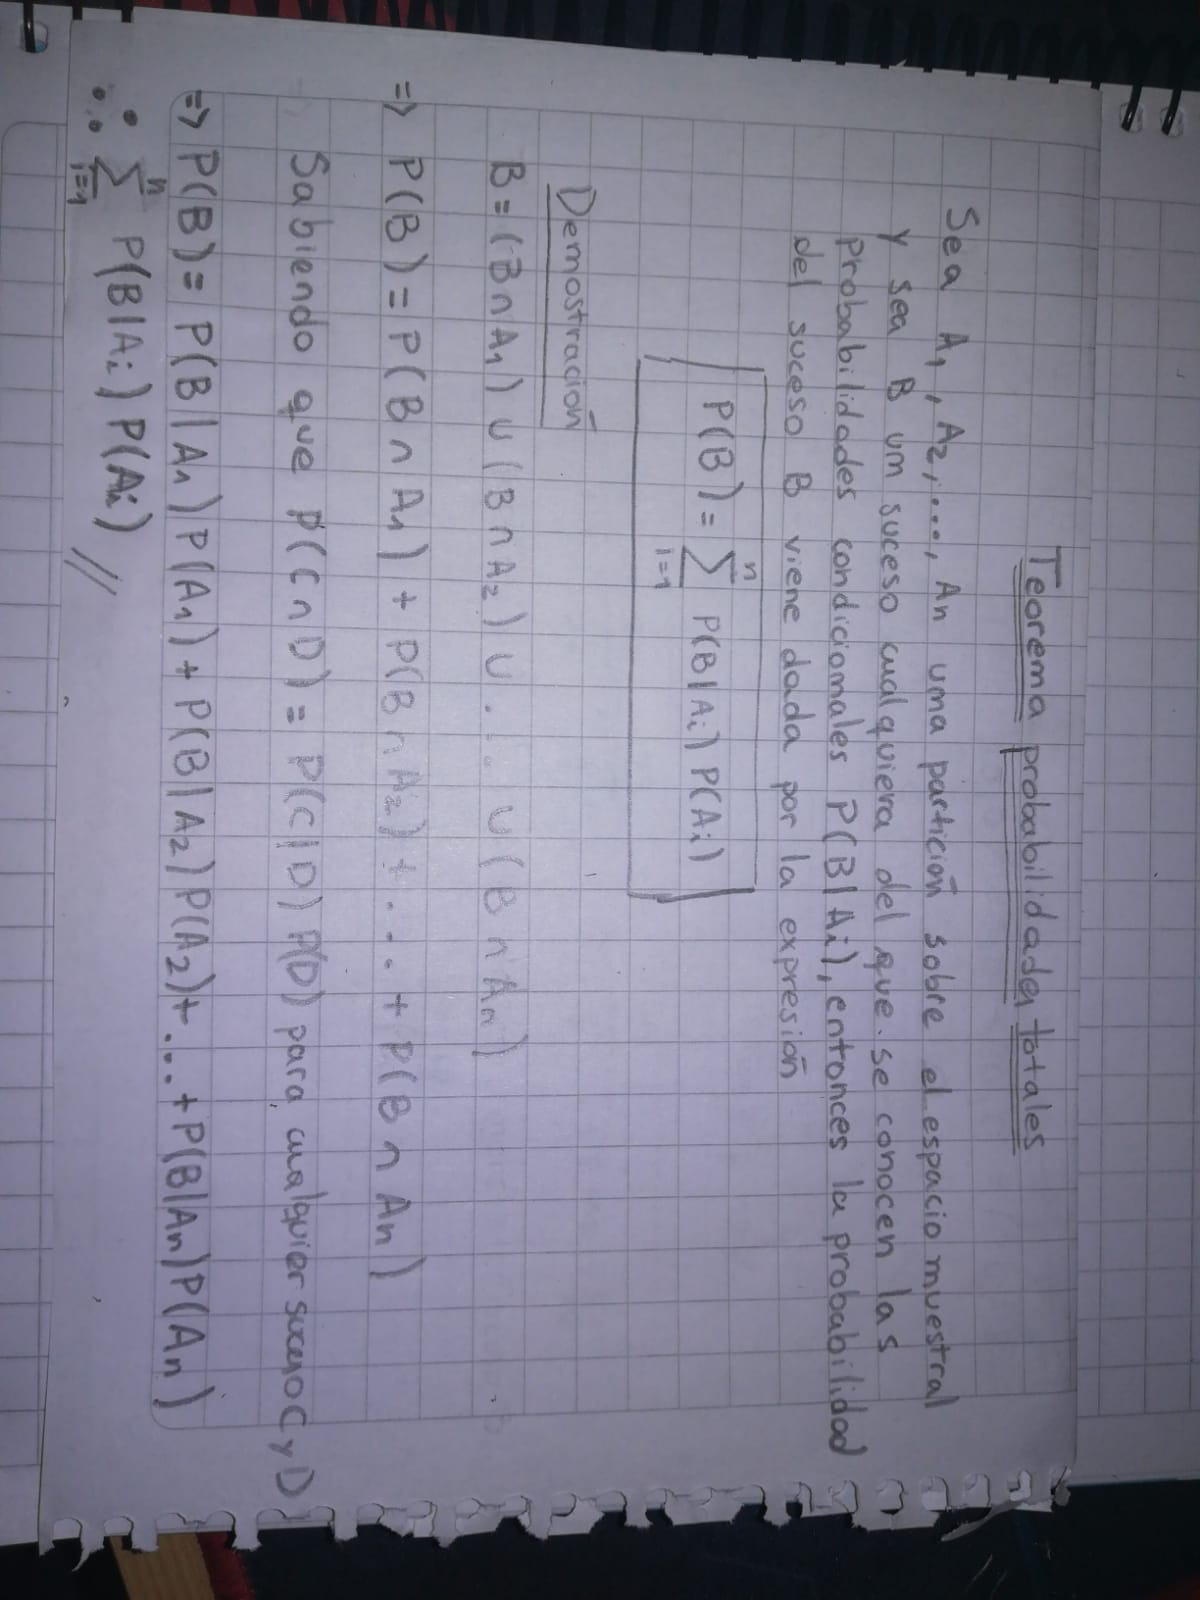

# Referencias
1. https://github.com/croach/statistics-for-hackers/blob/master/statistics-for-hackers.ipynb
2. Ross, S. M. (2006). Simulation. Elsevier.